In this homework assignment, we will again work with data from our competition ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Here, we will build a classification solution using kNearestNeighbors, find the optimal hyperparameters for this method, and create basic ensembles. This will allow us to compare the model's performance with previously studied methods.

0. Read the data from `train.csv` and preprocess it using your script `process_bank_churn.py` so that you end up with the data split into X_train, train_targets, X_val, val_targets for experiments.

  If you were unable to implement the script `process_bank_churn.py` in task `2.3. Decision Trees`, you can use the ready-made script from the proposed solution of that task.

In [ ]:
#https://github.com/ExcellentDarkTea/ML-Course/blob/main/homework/Topic2/2-3-DT/process_bank_churn.py
# Importing functions for data preprocessing

# Importing K-Nearest Neighbors classifier
# Importing ROC AUC score metric
# Importing Grid Search and Randomized Search for hyperparameter tuning

In [2]:
path = "../../../data/"
raw = pd.read_csv(path + "train.csv")

data = preprocess_data(raw)

X_train = data['train_X']
y_train = data['train_y']
X_val = data['val_X']
y_val = data['val_y']

display(X_train.head(), X_val.head())

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Male
7180,0.320187,-0.944682,-1.447264,1.475464,-1.108193,0.515062,1.016977,0.569450,1.0,0.0,0.0,1.0
10393,0.347838,0.161227,-1.087792,2.254434,-1.108193,0.515062,-0.983306,0.603803,1.0,0.0,0.0,0.0
80,0.638166,-0.330288,0.350096,1.223831,0.769304,0.515062,-0.983306,1.238026,0.0,1.0,0.0,1.0
3365,0.140460,2.495924,-1.806736,-0.717950,0.769304,-1.941514,1.016977,-1.457116,0.0,0.0,1.0,1.0
12236,0.665816,-2.050591,-0.728320,-0.717950,0.769304,0.515062,1.016977,0.670629,1.0,0.0,0.0,1.0


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Male
6490,0.762592,1.021379,-1.447264,1.214543,4.524299,0.515062,1.016977,-0.988144,0.0,1.0,0.0,1.0
3646,-0.910252,0.406985,-0.009376,-0.717950,0.769304,0.515062,1.016977,-1.750392,1.0,0.0,0.0,1.0
5306,0.997620,0.038348,-1.087792,-0.717950,0.769304,-1.941514,1.016977,-0.022404,1.0,0.0,0.0,0.0
652,0.195761,0.652742,-0.368848,1.881867,-1.108193,-1.941514,1.016977,-0.139723,1.0,0.0,0.0,0.0
2627,0.264887,-0.944682,-0.368848,-0.717950,0.769304,0.515062,-0.983306,0.563519,0.0,0.0,1.0,0.0


1. Train a kNN classifier on this data with default parameters and measure the accuracy using AUROC on the training and validation sets. Draw a conclusion about the obtained model: is it good/bad, is there high bias/high variance?

In [11]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_val = knn.predict_proba(X_val)[:, 1]
y_pred_train = knn.predict_proba(X_train)[:, 1]

train_auc = roc_auc_score(y_train, y_pred_train)
val_auc = roc_auc_score(y_val, y_pred_val)

print(f"K = {knn.n_neighbors}, Train AUC: {train_auc:.04}, Val AUC: {val_auc:.04}")
print(f"Accuracy: {knn.score(X_train, y_train):.02} {knn.score(X_val, y_val):.02}")
y_val.value_counts(normalize=True), y_train.value_counts(normalize=True)

K = 5, Train AUC: 0.962, Val AUC: 0.8755
Accuracy: 0.91 0.88


(Exited
 0.0    0.796667
 1.0    0.203333
 Name: proportion, dtype: float64,
 Exited
 0.0    0.7965
 1.0    0.2035
 Name: proportion, dtype: float64)

# Conclusions 1
- The Train AUC (0.962) is significantly higher than the Validation AUC (0.8755). This indicates that the model performs better on the training data than on the validation data. This may be a sign of overfitting; our model predicts the training data too well but cannot generalize to new data.
- Due to the model being overfit, we can conclude that there is High Variance (high accuracy on training data but significantly worse on validation data).
- The model can be considered mediocre. It is definitely not good because it is overfitted, but it is still capable of capturing dependencies in the data (Accuracy Train 0.91, Validation 0.88 is higher than if we simply assigned all classes to 0).

2. Using `GridSearchCV`, find the optimal value of the parameter `n_neighbors` for the `kNN` classifier. Set cross-validation to 5 folds.

  After successfully completing the search for the optimal hyperparameter:
    - display the best value of the parameter
    - save the best model found with `GridSearchCV` in a separate variable `knn_best`
    - evaluate the prediction quality of `knn_best` on the training and validation datasets using AUROC.
    - draw a conclusion about the model's quality. Has it improved compared to the previous point (2) of this task? Is it better than the decision tree from the previous homework?

In [16]:
params = {'n_neighbors': np.arange(1, 31, 1)}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid=params, cv=5, scoring='roc_auc', verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])},
             scoring='roc_auc', verbose=1)

In [17]:
print("Best params: ", grid_search.best_params_)

knn_best = grid_search.best_estimator_

y_pred_val = knn_best.predict_proba(X_val)[:, 1]
y_pred_train = knn_best.predict_proba(X_train)[:, 1]
train_auc = roc_auc_score(y_train, y_pred_train)
val_auc = roc_auc_score(y_val, y_pred_val)

print(f"K = {knn_best.n_neighbors}, Train AUC: {train_auc:.04}, Val AUC: {val_auc:.04}")

Best params:  {'n_neighbors': 25}
K = 25, Train AUC: 0.9364, Val AUC: 0.9151


# Conclusions 2

|model|Train AUC|Val AUC|number of neighbors|
|----|-----|------|----|
|Previous KNN|0.962|0.8755|5|
|Optimal KNN parameters|0.9364|0.9151|25|
|Decision trees|0.9256|0.9219|-|

- Our model has significantly improved, but the gap between training and validation accuracy is still large (based on previous experiments, if the gap for this dataset is greater than 1%, then the generalization is still not good enough, taking the submission score on Kaggle as a reference).
- Overall, we managed to reduce the gap in accuracies, and with an increased number of neighbors, the model generalizes significantly better. However, for decision trees, the model was more balanced/stable, so I preferred it.

3. Perform a search for optimal hyperparameters for `DecisionTreeClassifier` using `GridSearchCV` with the following parameter grid:
  - `max_depth` from 1 to 20 with a step of 2
  - `max_leaf_nodes` from 2 to 10 with a step of 1

  Be sure to initialize the model with a fixed `random_seed`.

  Set cross-validation to 3 folds, `scoring='roc_auc'`, and measure how much time the search for optimal hyperparameters takes.

  After successfully completing the search for optimal hyperparameters:
    - output the best parameter values
    - save the best model found with `GridSearchCV` in a separate variable `dt_best`
    - evaluate the prediction quality of `dt_best` on the training and validation datasets using AUROC.
    - draw a conclusion about the model's quality. Is this model better than the one you found manually?

In [6]:
print(np.arange(1, 21, 2))  # Print odd numbers from 1 to 20
print(np.arange(2, 11, 1))  # Print even numbers from 2 to 10

[ 1  3  5  7  9 11 13 15 17 19]
[ 2  3  4  5  6  7  8  9 10]


In [19]:
%%time
dt_params = {'max_depth': np.arange(1, 21, 2),
             'max_leaf_nodes': np.arange(2, 11, 1)}

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

dt_grid = GridSearchCV(dt, param_grid=dt_params, cv=3, scoring='roc_auc', verbose=1)
dt_grid.fit(X_train, y_train)
print(f"Best params: {dt_grid.best_params_}")

dt_best = dt_grid.best_estimator_
y_val_dt = dt_best.predict_proba(X_val)[:, 1]
y_train_dt = dt_best.predict_proba(X_train)[:, 1]

train_auc = roc_auc_score(y_train, y_train_dt)
val_auc = roc_auc_score(y_val, y_val_dt)

print(f"Train AUC: {train_auc:.04}, Val AUC: {val_auc:.04}")

Fitting 3 folds for each of 90 candidates, totalling 270 fits
Best params: {'max_depth': 5, 'max_leaf_nodes': 10}
Train AUC: 0.9015, Val AUC: 0.9002
CPU times: total: 3.48 s
Wall time: 3.47 s


# Conclusions 3
- The search for optimal parameters took 3.56 seconds: Best params: max_depth = 5, max_leaf_nodes = 10
- Unfortunately, the current model is 2% worse than the one without searching for optimal parameters.
- It seems that the maximum value for max_leaf_nodes needs to be increased, as the optimal achieved parameter for this parameter = maximum = 10.

4. Perform a search for optimal hyperparameters for `DecisionTreeClassifier` using `RandomizedSearchCV` with the given parameter grid and a number of iterations of 40.

  Set cross-validation to 3 folds, `scoring='roc_auc'`, fix the `random_seed` of the cross-validation procedure, and measure how much time the search for optimal hyperparameters takes.

  After successfully completing the search for optimal hyperparameters:
    - output the best parameter values
    - save the best model found with `RandomizedSearchCV` in a separate variable `dt_random_search_best`
    - evaluate the prediction quality of `dt_random_search_best` on the training and validation datasets using AUROC.
    - draw a conclusion about the model's quality. Is this model better than the one you found with `GridSearch`?
    - analyze the parameters of `dt_random_search_best` and compare them with the parameters of `dt_best` - what differences do you see? This exercise is needed to understand how different settings of `DecisionTreeClassifier` affect the model's quality.

In [21]:
%%time

params_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': np.arange(1, 20),
    'max_leaf_nodes': np.arange(2, 20),
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'sqrt', 'log2']
}

dt = DecisionTreeClassifier(random_state=42)
dt_random = RandomizedSearchCV(dt, param_distributions=params_dt, n_iter=40, cv=3, scoring='roc_auc', verbose=1)
dt_random.fit(X_train, y_train)

print (f"Best params: {dt_random.best_params_}")
dt_random_search_best = dt_random.best_estimator_

y_val_dt = dt_random_search_best.predict_proba(X_val)[:, 1]
y_train_dt = dt_random_search_best.predict_proba(X_train)[:, 1]

train_auc = roc_auc_score(y_train, y_train_dt)
val_auc = roc_auc_score(y_val, y_val_dt)

print(f"Train AUC: {train_auc:.04}, Val AUC: {val_auc:.04}")

Fitting 3 folds for each of 40 candidates, totalling 120 fits
Best params: {'splitter': 'best', 'min_samples_split': 20, 'min_samples_leaf': 2, 'max_leaf_nodes': 14, 'max_features': None, 'max_depth': 18, 'criterion': 'entropy'}
Train AUC: 0.9169, Val AUC: 0.9166
CPU times: total: 1.14 s
Wall time: 1.14 s


# Conclusions 4
- The search for optimal parameters took 1.1 seconds
- The model is slightly different from the previous one. At least max_depth has increased to 10
    - Best params: {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_leaf_nodes': 10, 'max_features': None, 'max_depth': 10, 'criterion': 'gini'}
- However, we achieved slightly better optimal parameters in a faster time (2 seconds faster search)

|model|Train AUC|Val AUC|
|----|-----|------|
|DT previous call|0.9256|0.9219|
|DT depth-5, leaf-10|0.9015|0.9002|
|DT current|0.9169|0.9166|

5. If you obtained the `AUROC` metric in this series of experiments - make another `submission` on Kaggle and add the code for it and a screenshot of the score on the public leaderboard below.

  I hope at this stage you already feel like a true researcher 😉

In [9]:
test = pd.read_csv(path + "test.csv")
test_data = preprocess_new_data(test, data)
y_test = dt_random_search_best.predict_proba(test_data)[:, 1]

submission = pd.read_csv(path + "sample_submission.csv")
submission['Exited'] = y_test
submission.to_csv("submission_RF.csv", index=False)
submission.head()

,id,Exited
0,15000,0.144330
1,15001,0.020862
2,15002,0.020862
3,15003,0.618718
4,15004,0.020862


C:\Users\Olha Shaposhnyk\AppData\Local\Temp\ipykernel_28232\717951548.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import Image, display


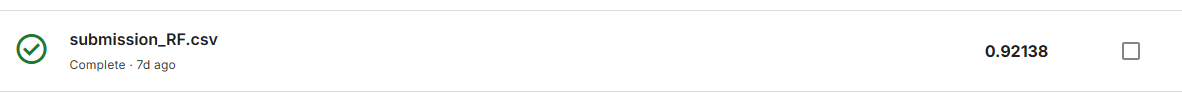

In [ ]:
# this accuracy was achieved after additional parameter tuning, by expanding their maximum values